# 数据探索


In [1]:
import pandas as pd
import numpy as np

In [2]:
from flags import FLAGS, unparsed
from ml.ml_utils import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


['', 'C:\\ProgramData\\Anaconda3\\python36.zip', 'C:\\ProgramData\\Anaconda3\\DLLs', 'C:\\ProgramData\\Anaconda3\\lib', 'C:\\ProgramData\\Anaconda3', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Babel-2.5.0-py3.6.egg', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\xgboost-0.7-py3.6.egg', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\huang\\.ipython', 'D:\\GitHub\\kaggle-avazu\\avazu_code\\ml', 'D:\\GitHub\\kaggle-avazu\\avazu_code\\ml/..']


In [3]:
from joblib import dump, load, Parallel, delayed


In [5]:
gbm = load('D:/'+'cv_params_lambdalgbm.joblib_dat')
gbm

{'bagging_fraction': 0.1,
 'bagging_freq': 5,
 'boosting': 'dart',
 'boosting_type': 'gbdt',
 'feature_fraction': 0.3,
 'lambda_l1': 1.0,
 'lambda_l2': 0.7,
 'learning_rate': 0.01,
 'max_bin': 7,
 'max_depth': 7,
 'metric': ['binary_error'],
 'min_data_in_leaf': 85,
 'min_split_gain': 0.1,
 'num_leaves': 165,
 'objective': 'binary',
 'sparse_threshold': 1.0,
 'verbose': 1}

In [3]:
round(100.000056)

100

In [5]:
 """
• id: ad identifier （广告 ID）
• click: 0/1 for non-click/click （是否被点击，其中 0 为不被点击，1 为不被点击，此列为目
标变量）
• hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC. （时间）
• C1 -- anonymized categorical variable （类别型变量）
• banner_pos （广告位置）
• site_id （站点 ID）
• site_domain （站点领域）
• site_category （站点类别）
• app_id （APP ID）
• app_domai
• C14-C21 -- anonymized categorical variables （类别型变量）
 """
#读取数据
train = pd.read_csv(FLAGS.src_train_path,nrows =500)

FileNotFoundError: File b'/home/zhijiehuang/github/data/train.csv' does not exist

In [4]:
train.shape

(500, 24)

In [5]:
pd.concat([train,train],axis = 1).shape

(500, 48)

In [6]:
train['device_id'].apply(lambda x: x[:2])

0      a9
1      a9
2      a9
3      a9
4      a9
5      a9
6      a9
7      a9
8      a9
9      c3
10     a9
11     a9
12     a9
13     a9
14     a9
15     a9
16     a9
17     a9
18     a9
19     a9
20     a9
21     a9
22     a9
23     a9
24     a9
25     fb
26     a9
27     9a
28     a9
29     a9
       ..
470    a9
471    3c
472    a9
473    a9
474    a9
475    a9
476    a9
477    a9
478    a9
479    a9
480    a9
481    c3
482    a9
483    a9
484    a9
485    a9
486    a9
487    a9
488    a9
489    a9
490    a9
491    a9
492    a9
493    a9
494    a9
495    a9
496    a9
497    a9
498    a9
499    a9
Name: device_id, Length: 500, dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
id                  500 non-null uint64
click               500 non-null int64
hour                500 non-null int64
C1                  500 non-null int64
banner_pos          500 non-null int64
site_id             500 non-null object
site_domain         500 non-null object
site_category       500 non-null object
app_id              500 non-null object
app_domain          500 non-null object
app_category        500 non-null object
device_id           500 non-null object
device_ip           500 non-null object
device_model        500 non-null object
device_type         500 non-null int64
device_conn_type    500 non-null int64
C14                 500 non-null int64
C15                 500 non-null int64
C16                 500 non-null int64
C17                 500 non-null int64
C18                 500 non-null int64
C19                 500 non-null int64
C20                 500 non

In [8]:
train['site_id'].dtypes=='object'

True

In [9]:
dict((key,-1) if value <10 else (key,value)  for key,value in dict(train['device_id'].value_counts()).items())

{'017c59a6': -1,
 '03cb167d': -1,
 '0c3bbac0': -1,
 '0cc497c8': -1,
 '0f4a50fd': -1,
 '175e2558': -1,
 '1ab3feec': -1,
 '1c6dc527': -1,
 '1d5b4c5e': -1,
 '266f36a6': -1,
 '2a5eebfd': -1,
 '2ad16ba3': -1,
 '2c01b6dc': -1,
 '2c5594e1': -1,
 '30f17f5f': -1,
 '31f9b704': -1,
 '336ed370': -1,
 '3aa38dfe': -1,
 '3b4d9b97': -1,
 '3c0208dc': -1,
 '432cd280': -1,
 '4b2309e9': -1,
 '556a65e5': -1,
 '598b6ac9': -1,
 '665bffed': -1,
 '6a943594': -1,
 '6b17789a': -1,
 '71c467d1': -1,
 '767a174e': -1,
 '7d98887a': -1,
 '7f4b1f1e': -1,
 '8205da6e': -1,
 '890abcbb': -1,
 '8a869341': -1,
 '936e92fb': -1,
 '971d35f0': -1,
 '9906e40c': -1,
 '9af87478': -1,
 'a167aa83': -1,
 'a2cbb1e0': -1,
 'a3d873bc': -1,
 'a6060f2f': -1,
 'a7420ec6': -1,
 'a99f214a': 436,
 'ac49f12d': -1,
 'b36096d3': -1,
 'b45aada4': -1,
 'bc47be9e': -1,
 'bd544220': -1,
 'bd7c02a1': -1,
 'c34f8cb7': -1,
 'c357dbff': -1,
 'cb1fc8bd': -1,
 'cb73ba55': -1,
 'd2bbb640': -1,
 'd4a4f036': -1,
 'dacad7fd': -1,
 'df373817': -1,
 'e62f1261': 

train = pd.read_csv("D:/GitHub/data/avazu_data/train.csv",usecols=[2],nrows =50)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
id                  500 non-null uint64
click               500 non-null int64
hour                500 non-null int64
C1                  500 non-null int64
banner_pos          500 non-null int64
site_id             500 non-null object
site_domain         500 non-null object
site_category       500 non-null object
app_id              500 non-null object
app_domain          500 non-null object
app_category        500 non-null object
device_id           500 non-null object
device_ip           500 non-null object
device_model        500 non-null object
device_type         500 non-null int64
device_conn_type    500 non-null int64
C14                 500 non-null int64
C15                 500 non-null int64
C16                 500 non-null int64
C17                 500 non-null int64
C18                 500 non-null int64
C19                 500 non-null int64
C20                 500 non

In [11]:

train['date']=pd.to_datetime((train['hour'] / 100).map(int)+20000000)
        
train['one_day']=train['date'].dt.day
train['one_day_hour'] = train['date'].dt.hour
train['week_day'] = train['date'].dt.dayofweek
train['day_hour_prev'] = train['one_day_hour'] - 1
train['day_hour_next'] = train['one_day_hour'] + 1
train['is_work_day'] = train['week_day'].apply(lambda x: 1 if x in [0,1,2,3,4] else 0)
train[train['is_work_day']==0]

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C19,C20,C21,date,one_day,one_day_hour,week_day,day_hour_prev,day_hour_next,is_work_day


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
id                  500 non-null uint64
click               500 non-null int64
hour                500 non-null int64
C1                  500 non-null int64
banner_pos          500 non-null int64
site_id             500 non-null object
site_domain         500 non-null object
site_category       500 non-null object
app_id              500 non-null object
app_domain          500 non-null object
app_category        500 non-null object
device_id           500 non-null object
device_ip           500 non-null object
device_model        500 non-null object
device_type         500 non-null int64
device_conn_type    500 non-null int64
C14                 500 non-null int64
C15                 500 non-null int64
C16                 500 non-null int64
C17                 500 non-null int64
C18                 500 non-null int64
C19                 500 non-null int64
C20                 500 non

In [13]:
print (train.columns.values)
min_col=['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id',
       'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model',
       'device_type', 'device_conn_type']

['id' 'click' 'hour' 'C1' 'banner_pos' 'site_id' 'site_domain'
 'site_category' 'app_id' 'app_domain' 'app_category' 'device_id'
 'device_ip' 'device_model' 'device_type' 'device_conn_type' 'C14' 'C15'
 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'date' 'one_day' 'one_day_hour'
 'week_day' 'day_hour_prev' 'day_hour_next' 'is_work_day']


for col in min_col:
    rets=col_anly(col)
    col_plt(rets,col,plt)

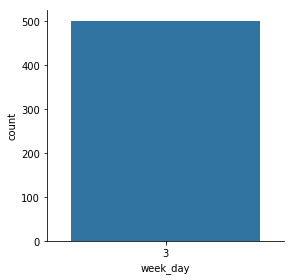

In [14]:
sns_factorplot(train_one=train,col_name='week_day',kind='count',plt=plt,sns=sns)

In [19]:
a=pd.read_csv('/home/zhijiehuang/github/data/test.csv')

In [21]:
a.shape

(4577464, 23)

In [18]:
a['click'].unique()

array([0, 1])

In [16]:
a.drop('Unnamed: 0',axis=1,inplace = True)

In [28]:
a.head()

,click
0,0
1,0
2,0
3,0
4,0


In [ ]:
a.un

In [19]:
a=[1,2,3]
b=[2,3,4]
list(set(a).difference(set(b)))

[1]

In [20]:
test = pd.read_csv(FLAGS.src_test_path)

In [22]:
test.shape

(4577464, 23)

In [23]:
45006431-4577464

40428967